# Atividade 2 de Aprendizado de Máquina: Regressão Linear
- **Aluna:** Bárbara Neves
- **Matrícula:** 388713

## Descrição 

Fazer as análises listadas abaixo usando a implementação da Regressão Linear feita na atividade passada.

## Imports Iniciais 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Espero que não tenha problema em usar o Pandas para ler o arquivo
import pandas as pd

from sklearn.model_selection import train_test_split

## Funções

### Regressão Linear

In [2]:
class LinearRegression():
    
    def __init__(self):
        pass

    def fit(self, X, y):
        
        n = X.shape[0]
        X_ = np.c_[np.ones(n), X]
        
        beta = np.linalg.pinv(X_.T @ X_) @ X_.T @ y
        
        self.B = beta
        
    def predict(self, X):
        
        n = X.shape[0]
        X_ = np.c_[np.ones(n), X]
        
        return X_ @ self.B
    
    def coef_(self):
        return self.B

### Gráficos para Visualização

In [3]:
def plot_(X, y, X_name, y_name):

    plt.scatter(X, y, marker='o', s=10)

    plt.xlabel(X_name)
    plt.ylabel(y_name)

    plt.show()

In [4]:
def plot_linear_regression(X, y, y_pred, X_name, y_name):
    
    plt.scatter(X, y, marker='o', s=10)

    plt.xlabel(X_name)
    plt.ylabel(y_name)

    plt.plot(X, y_pred, color="g");

## Leitura do dataset Boston House Price Dataset

In [5]:
df = pd.DataFrame(columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PIRATIO', 
                           'B', 'LSTAT', 'MEDV'])

data = np.loadtxt("housing.data")

In [6]:
for vet in data:
    df = df.append({
        'CRIM': vet[0], 
        'ZN': vet[1], 
        'INDUS': vet[2],
        'CHAS': vet[3], 
        'NOX': vet[4],
        'RM': vet[5],
        'AGE': vet[6],
        'DIS': vet[7],
        'RAD': vet[8],
        'TAX': vet[9],
        'PIRATIO': vet[10],
        'B': vet[11],
        'LSTAT': vet[12],
        'MEDV': vet[13]
    }, ignore_index=True)
    
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Dividindo o conjunto de dados 

A variável LSTAT servirá como atributo preditor e a variável MEDV como atributo alvo. O conjunto de dados será dividido em 80% para treino e 20% para teste.

In [7]:
X = df['LSTAT'].values
y = df['MEDV'].values

X.shape, y.shape

((506,), (506,))

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((404,), (404,)), ((102,), (102,)))

## Aplicando a Regressão Linear 

In [84]:
LR = LinearRegression()

### Treino

In [85]:
LR.fit(X_train, y_train)

In [86]:
y_pred_train = LR.predict(X_train)

In [87]:
# Coeficientes 
LR.coef_()

array([34.83694982, -0.9665309 ])

### Teste

In [88]:
LR.fit(X_test, y_test)

In [89]:
y_pred_test = LR.predict(X_test)

In [90]:
# Coeficientes
LR.coef_()

array([33.3177631 , -0.88094433])

### Reportando as métricas MSE e R2 Score para os conjuntos de treino e teste

#### Métricas

In [91]:
# RSS será usada para calcular as métricas MSE e R2
def RSS(y_true, y_pred):
    
    rss = np.sum((y_pred - y_true)**2)
    
    return rss

In [92]:
# MSE
def MSE(y_true, y_pred):
    
    n = len(y_true)
    
    rss = RSS(y_true, y_pred)
    mse = rss/n
    
    return mse

In [93]:
# R2
def R2(y_true, y_pred):
    
    rss = RSS(y_true, y_pred)
    tss = np.sum((y_true - np.mean(y_true))**2)

    r2 = 1 - (rss/tss)
    
    return r2

#### Treino

In [94]:
metrics_train = {
    'MSE': MSE(y_train, y_pred_train),
    'R2': R2(y_train, y_pred_train),
}

metrics_train

{'MSE': 39.76038682967428, 'R2': 0.5423180734793517}

#### Teste

In [96]:
metrics_test = {
    'MSE': MSE(y_test, y_pred_test),
    'R2': R2(y_test, y_pred_test),
}

metrics_train

{'MSE': 39.76038682967428, 'R2': 0.5423180734793517}

### Gráficos com LSTAT no eixo X e MEDV no eixo Y dos dados originais

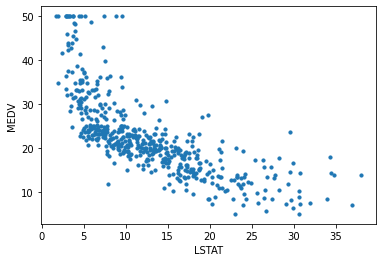

In [97]:
plot_(X, y, 'LSTAT', 'MEDV')

In [98]:
LR.fit(X, y)

y_pred = LR.predict(X)

y_pred.shape

(506,)

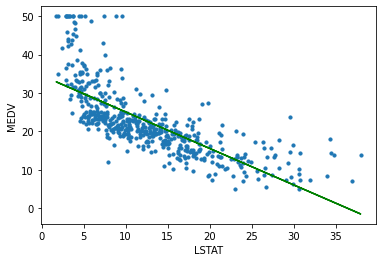

In [99]:
plot_linear_regression(X, y, y_pred, 'LSTAT', 'MEDV')

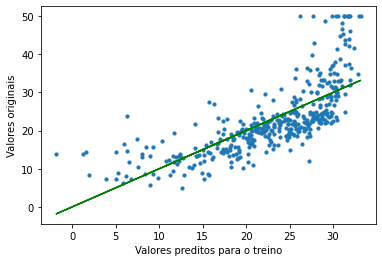

In [100]:
plot_linear_regression(y_pred_train, y_train, y_pred_train, 'Valores preditos para o treino', 'Valores originais')